In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


In [ ]:
data = pd.read_csv('/content/train_data (1).csv')

In [ ]:
# Split the data into training and testing sets
train_reviews, test_reviews, train_labels, test_labels = train_test_split(
    data['0'].values, data['1'].values, test_size=0.2, random_state=42)


In [ ]:
# Tokenize the text data
vocab_size = 10000  # Use top 10,000 words
maxlen = 256       # Max length of sequences
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_reviews)

train_sequences = tokenizer.texts_to_sequences(train_reviews)
test_sequences = tokenizer.texts_to_sequences(test_reviews)

x_train = pad_sequences(train_sequences, maxlen=maxlen)
x_test = pad_sequences(test_sequences, maxlen=maxlen)

In [ ]:
# Convert labels to categorical format
encoder = LabelEncoder()
train_labels = encoder.fit_transform(train_labels)
test_labels = encoder.transform(test_labels)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Build the model
model = Sequential([
    Embedding(vocab_size, 16, input_length=maxlen),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, train_labels, epochs=10, batch_size=32,
                    validation_data=(x_test, test_labels), verbose=1)

Epoch 1/10
625/625 [==============================] - 6s 9ms/step - loss: 0.5417 - accuracy: 0.7592 - val_loss: 0.3430 - val_accuracy: 0.8672
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2917 - accuracy: 0.8857 - val_loss: 0.2758 - val_accuracy: 0.8900
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2243 - accuracy: 0.9179 - val_loss: 0.2655 - val_accuracy: 0.8974
Epoch 4/10
625/625 [==============================] - 4s 6ms/step - loss: 0.1853 - accuracy: 0.9339 - val_loss: 0.2711 - val_accuracy: 0.8928
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 0.1580 - accuracy: 0.9439 - val_loss: 0.2750 - val_accuracy: 0.8958
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.1326 - accuracy: 0.9556 - val_loss: 0.2910 - val_accuracy: 0.8932
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.1143 - accuracy: 0.9643 - val_loss: 0.3127 - val_accuracy: 0.8880
Epoch 

In [ ]:
# Evaluate the model
results = model.evaluate(x_test, test_labels, verbose=2)
print('\nTest accuracy:', results[1])

157/157 - 0s - loss: 0.4207 - accuracy: 0.8770 - 247ms/epoch - 2ms/step

Test accuracy: 0.8769999742507935


In [ ]:
# Plotting the training and validation loss and accuracy
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

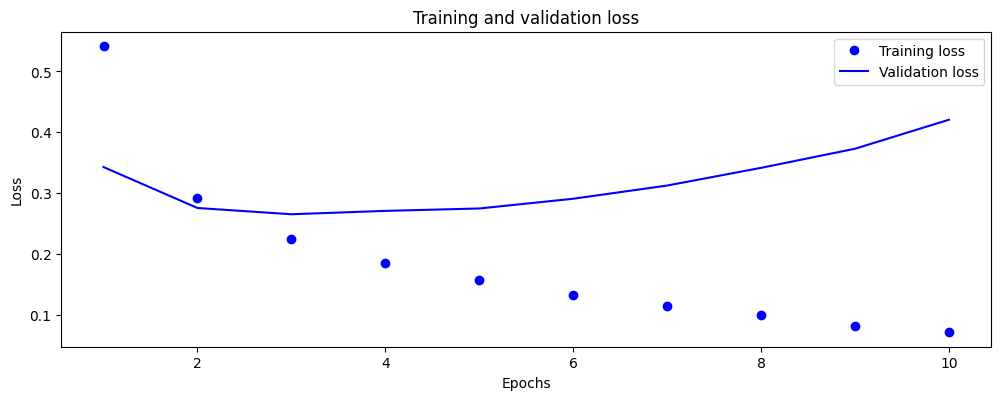

In [ ]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 9))
plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

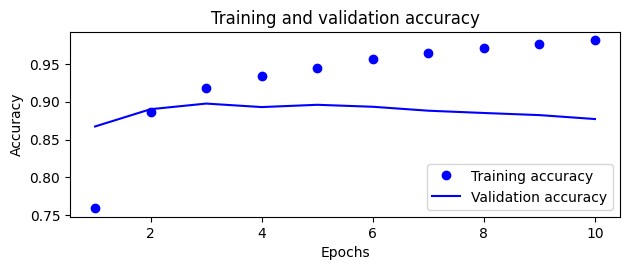

In [ ]:
# Plotting the training and validation accuracy
plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
